In [1]:
from pybaseball import statcast
from pybaseball import pitching_stats_bref
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loads in the Baseball Reference and Statcast data

In [2]:
bref_df = pitching_stats_bref("2023")
bref_df = bref_df[["Name", "ERA"]]

bref_df

,Name,ERA
1,Fernando Abad,4.26
2,Andrew Abbott,3.87
3,Cory Abbott,6.64
4,Albert Abreu,4.73
5,Bryan Abreu,1.75
...,...,...
893,Rob Zastryzny,4.79
894,Seby Zavala,0.00
895,Angel Zerpa,4.85
896,Bruce Zimmermann,4.73


In [3]:
savant_df = statcast(start_dt = "2023-03-30", end_dt = "2023-10-02")
#pd.set_option('display.max_columns', None)

savant_df

This is a large query, it may take a moment to complete


100%|██████████| 187/187 [03:29<00:00,  1.12s/it]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2436,CH,2023-10-01,89.0,-2.8,5.59,"Robertson, Nick",677008,687798,field_out,hit_into_play,...,6,6,1,1,6,NaN,Standard,250,0.0,-0.09
2469,FF,2023-10-01,96.9,-2.4,5.9,"Robertson, Nick",677008,687798,NaN,foul,...,6,6,1,1,6,NaN,Standard,211,0.0,0.0
2538,CH,2023-10-01,90.0,-2.93,5.56,"Robertson, Nick",677008,687798,NaN,ball,...,6,6,1,1,6,NaN,Standard,250,0.0,0.016
2674,SL,2023-10-01,82.2,-3.09,5.55,"Robertson, Nick",677008,687798,NaN,ball,...,6,6,1,1,6,NaN,Standard,58,0.0,0.009
2785,CH,2023-10-01,89.2,-2.87,5.58,"Robertson, Nick",677008,687798,NaN,swinging_strike,...,6,6,1,1,6,NaN,Standard,257,0.0,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,NaN,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.0,-0.079
3996,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,NaN,called_strike,...,0,0,0,0,0,Standard,Strategic,229,0.0,-0.077
4191,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,NaN,ball,...,0,0,0,0,0,Standard,Strategic,233,0.0,0.135
4355,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,NaN,ball,...,0,0,0,0,0,Standard,Standard,237,0.0,0.064


In [4]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12

savant_df = savant_df.rename(columns={'player_name': 'Name', 'pitch_type': 'Pitch Type'})
savant_df

,Pitch Type,game_date,release_speed,release_pos_x,release_pos_z,Name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB
2436,CH,2023-10-01,89.0,-2.8,5.59,"Robertson, Nick",677008,687798,field_out,hit_into_play,...,1,1,6,NaN,Standard,250,0.0,-0.09,3.96,-18.36
2469,FF,2023-10-01,96.9,-2.4,5.9,"Robertson, Nick",677008,687798,NaN,foul,...,1,1,6,NaN,Standard,211,0.0,0.0,16.32,-9.12
2538,CH,2023-10-01,90.0,-2.93,5.56,"Robertson, Nick",677008,687798,NaN,ball,...,1,1,6,NaN,Standard,250,0.0,0.016,4.32,-19.8
2674,SL,2023-10-01,82.2,-3.09,5.55,"Robertson, Nick",677008,687798,NaN,ball,...,1,1,6,NaN,Standard,58,0.0,0.009,3.36,17.16
2785,CH,2023-10-01,89.2,-2.87,5.58,"Robertson, Nick",677008,687798,NaN,swinging_strike,...,1,1,6,NaN,Standard,257,0.0,-0.023,3.72,-17.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,NaN,called_strike,...,0,0,0,Standard,Standard,234,0.0,-0.079,5.52,-20.28
3996,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,NaN,called_strike,...,0,0,0,Standard,Strategic,229,0.0,-0.077,13.92,-15.36
4191,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,NaN,ball,...,0,0,0,Standard,Strategic,233,0.0,0.135,14.28,-9.6
4355,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,NaN,ball,...,0,0,0,Standard,Standard,237,0.0,0.064,4.92,-20.52


In [5]:
def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

### Groups by a pitchers' name and finds all the stats used to calculate sPRA

In [14]:
player_grouped = savant_df.groupby(['Name']).agg(
    Pitches = ('Pitch Type', 'count'),
    BB = ('events', lambda x: (x == 'walk').sum()),
    HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    GB = ('bb_type', lambda x: (x == 'ground_ball').sum()),
    LD = ('bb_type', lambda x: (x == 'line_drive').sum()),
    FB = ('bb_type', lambda x: (x == 'fly_ball').sum()),
    PU = ('bb_type', lambda x: (x == 'popup').sum()),
    PA = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()))

league_average = player_grouped[player_grouped['PA'] >= 5]
player_grouped = player_grouped[player_grouped['PA'] >= 350]
player_grouped

,Pitches,BB,HBP,K,GB,LD,FB,PU,PA
Name,,,,,,,,,
Aaron Civale,2009,33,5,116,139,83,96,31,494
Aaron Nola,3087,45,1,198,235,134,141,35,779
Adam Wainwright,1785,40,1,55,159,104,110,14,469
Adrian Houser,1856,34,1,95,165,72,95,18,472
Alek Manoah,1689,56,9,79,104,65,78,21,405
...,...,...,...,...,...,...,...,...,...
Zach Davies,1498,39,2,72,117,69,65,13,371
Zach Eflin,2577,23,3,185,247,99,108,36,690
Zack Greinke,2219,23,4,95,205,118,121,25,580


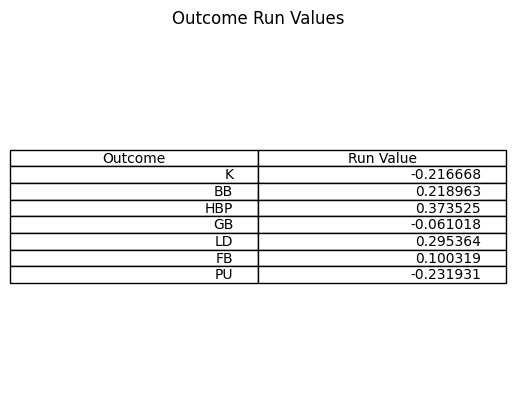

In [15]:
K = -0.216668
BB = 0.218963
HBP = 0.373525
GB = -0.061018
LD = 0.295364
FB = 0.100319
PU = -0.231931

outcomes = ["K", "BB", "HBP", "GB", "LD", "FB", "PU"]
run_values = [K, BB, HBP, GB, LD, FB, PU]

RunValues = pd.DataFrame({'Outcome': outcomes, 'Run Value': run_values})
RunValues

fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= RunValues.values, colLabels= RunValues.columns, loc='center')

ax.set_title("Outcome Run Values")

plt.savefig("Outcomes.png")
plt.show()

In [16]:
player_grouped["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * player_grouped["BB"]) + (HBP * 16.38860664066341 * player_grouped["HBP"]) + (K * 16.38860664066341 * player_grouped["K"]) + 
    (FB * 16.38860664066341 * player_grouped["FB"]) + (LD * 16.38860664066341 * player_grouped["LD"]) + (PU * 16.38860664066341 * player_grouped["PU"]) + (GB * 16.38860664066341 * player_grouped["GB"]))
    / player_grouped["PA"]) + 4.05, 2)
player_grouped = player_grouped.sort_values(by = "sPRA")
player_grouped = player_grouped.reset_index()
player_grouped

,Name,Pitches,BB,HBP,K,GB,LD,FB,PU,PA,sPRA
0,Tyler Glasnow,1894,37,1,162,145,63,66,11,481,3.57
1,Zach Eflin,2577,23,3,185,247,99,108,36,690,3.62
2,Freddy Peralta,2839,54,6,210,175,84,111,39,667,3.63
3,Spencer Strider,3087,57,9,281,145,107,132,31,748,3.65
4,Shohei Ohtani,2094,55,11,167,136,61,76,24,524,3.74
...,...,...,...,...,...,...,...,...,...,...,...
157,Chase Anderson,1447,33,7,64,97,64,93,14,365,4.68
158,Luis L. Ortiz,1462,48,2,59,141,71,74,5,386,4.71
159,Cal Quantrill,1710,35,7,57,139,95,85,25,432,4.77
160,Noah Syndergaard,1408,19,10,56,117,86,85,18,386,4.80


In [17]:
league_average["sPRA"] = round(
    ((0.85 * (BB * 16.38860664066341 * league_average["BB"]) + (HBP * 16.38860664066341 * league_average["HBP"]) + (K * 16.38860664066341 * league_average["K"]) + 
    (FB * 16.38860664066341 * league_average["FB"]) + (LD * 16.38860664066341 * league_average["LD"]) + (PU * 16.38860664066341 * league_average["PU"]) + (GB * 16.38860664066341 * league_average["GB"]))
    / league_average["PA"]) + 4.05, 2)

### Merges the BRef and Statcast tables together to have sPRA and ERA on the same table and show the top 15 in sPRA

In [18]:
Merged = pd.merge(bref_df, player_grouped, on='Name', how='left')
Merged.loc[:, "sPRA - ERA"] = round(Merged["sPRA"] - Merged["ERA"], 2)
Merged.loc[:, "sPRA+"] =  round((np.mean(league_average["sPRA"]) / Merged["sPRA"]) * 100, 2)
top15 = Merged.sort_values(by = "sPRA", ascending = True)
top15 = top15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
top15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
272,Tyler Glasnow,3.57,3.53,0.04,120.70
207,Zach Eflin,3.62,3.50,0.12,119.03
590,Freddy Peralta,3.63,3.86,-0.23,118.70
737,Spencer Strider,3.65,3.86,-0.21,118.05
563,Shohei Ohtani,3.74,3.14,0.60,115.21
109,Edward Cabrera,3.76,4.24,-0.48,114.60
815,Logan Webb,3.77,3.25,0.52,114.29
160,Kutter Crawford,3.78,4.04,-0.26,113.99
261,Kevin Gausman,3.78,3.16,0.62,113.99
690,Kodai Senga,3.79,2.98,0.81,113.69


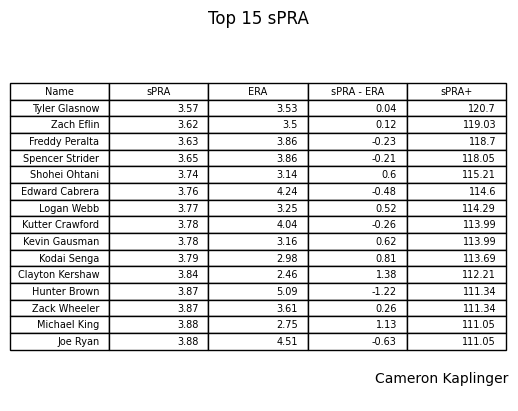

In [19]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= top15.values, colLabels= top15.columns, loc='center')

ax.set_title("Top 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Top15.png")
plt.show()

### Displays the bottom 15 in sPRA

In [20]:
bottom15 = Merged.sort_values(by = "sPRA", ascending = False)
bottom15 = bottom15[["Name", "sPRA", "ERA", "sPRA - ERA", "sPRA+"]].head(15)
bottom15

,Name,sPRA,ERA,sPRA - ERA,sPRA+
800,Adam Wainwright,4.91,7.40,-2.49,87.76
750,Noah Syndergaard,4.80,6.50,-1.70,89.77
618,Cal Quantrill,4.77,5.24,-0.47,90.33
118,Carlos Carrasco,4.68,6.80,-2.12,92.07
22,Chase Anderson,4.68,5.42,-0.74,92.07
687,Connor Seabold,4.67,7.52,-2.85,92.27
239,Kyle Freeland,4.64,5.03,-0.39,92.86
233,Chris Flexen,4.64,6.86,-2.22,92.86
25,Tyler Anderson,4.63,5.43,-0.80,93.06
540,Kyle Muller,4.61,7.60,-2.99,93.47


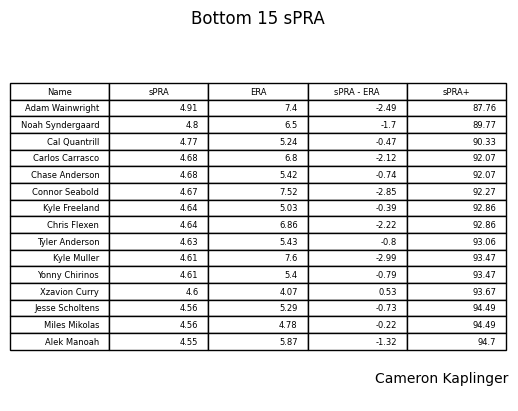

In [21]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= bottom15.values, colLabels= bottom15.columns, loc='center')

ax.set_title("Bottom 15 sPRA")

caption = "Cameron Kaplinger"
fig.text(0.8, 0.15, caption, ha='center', fontsize=10)

plt.savefig("Bottom15.png")
plt.show()